# Opinion Formation

### Imports

In [1]:
import numpy as np
import random
import math
import os
import scipy as sp
import cellpylib as cpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import demos.ca.cellular_automata as ca
#from demos.ca.CA_module import CA
# For cluster counting
from pylab import *
from scipy.ndimage import measurements

import powerlaw


## Move all results we want to keep here

## Generate new results here

## Finding critical temperature

In [33]:
################################
# System Parameters            #
################################
GRIDSIZE_X,GRIDSIZE_Y = 21,21
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
P_OCCUPATION = 1
P_OPINION_1 = 0 # In this scenario everybody believed the leader at start, so should be 0
S_LEADER = 100             # The one 
a_0 = 1
S_MEAN = 1
TEMP = 0 # Starts at 0

In [34]:
################################
# Calibration Parameters       #
################################
TIMESTEPS = 50 # Of each sim
TMIN = 80
TMAX = 150
T_VALUES = 10
SIMS_PER_TEMP = 5

R = GRIDSIZE_X/2

# THRESHOLD = 10 # Old
THRESHOLD = int(np.sqrt((R**2)/2)) # 5 # Threshold such that less than half of total nodes believe leader!

Expect clusters? True


0it [00:00, ?it/s]


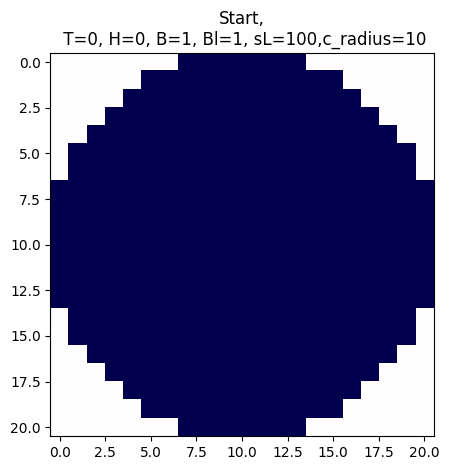

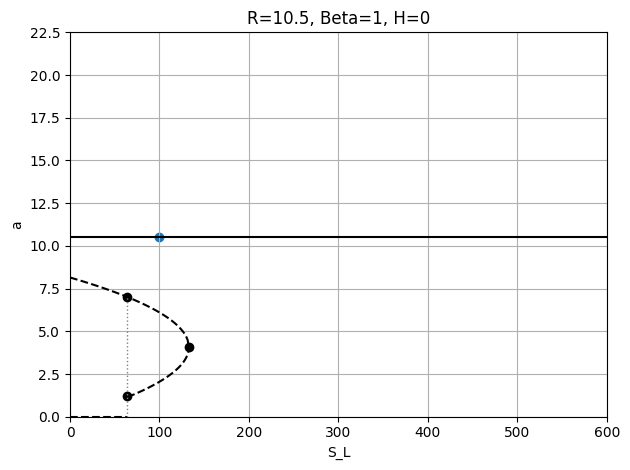

In [36]:
# Do one iteration and plot to ensure
# (1) everybody has same belief
# (2) in analytical diagram, we are in zone within prabola

TIMESTEPS_DEMO = 1
model = ca.CA(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA_PEOPLE, beta_leader=BETA_LEADER, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN)

if TEMP == 0:
    expect_cluster = ca.analytical_expect_clusters(
        GRIDSIZE_X/2, BETA_PEOPLE, H, S_LEADER)
    print('Expect clusters?', expect_cluster)

model = ca.CA(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA_PEOPLE, beta_leader=BETA_LEADER, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN)
data = model.evolve(TIMESTEPS_DEMO)
simulation = data['opinions']
cluster_sizes = data['cluster_sizes']

# Plot first frame
plt.figure()
plt.imshow(model.starting_grid, cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.title(f'Start,\n T={TEMP}, H={H}, B={BETA_PEOPLE}, Bl={BETA_LEADER}, sL={S_LEADER},c_radius={int(cluster_sizes[0])}')
plt.tight_layout()
plt.show()



# Plot diagram to ensure we are within parabola!
fig, ax = ca.plot_diagram(GRIDSIZE_X/2,BETA_PEOPLE,H)

ax.scatter(S_LEADER,cluster_sizes[-1])


R = GRIDSIZE_X/2
S_L_min = ca.minimun_leader_strength(R,BETA_PEOPLE,H)
S_L_max = ca.maximun_leader_strength(R,BETA_PEOPLE,H)
cluster_min = ca.a(R,BETA_PEOPLE,H,S_L_min)
cluster_max = ca.a(R,BETA_PEOPLE,H,S_L_max)
xmin,xmax = 0,2*S_L_max
ymin,ymax = 0,22.5



# Analytical assert just in case!
S_L_min = ca.minimun_leader_strength(R,BETA_PEOPLE,H)
S_L_max = ca.maximun_leader_strength(R,BETA_PEOPLE,H)


assert (S_L_min <= S_LEADER and S_LEADER<= S_L_max), f'To calibrate Tc, leader influence must be between analytical S_L_min and S_L_max values, {S_L_min} <= {S_LEADER} <= {S_L_max}'

assert (cluster_sizes[0] == R), f'To calibrate for the critical temperature, the innitial cluster must be of size R, {cluster_sizes[0]},{R}'

In [38]:
# Call function
temperatures,p_overcoming_leader = ca.find_critical_temperature(TMIN,TMAX,TIMESTEPS,T_VALUES,SIMS_PER_TEMP,THRESHOLD,GRIDSIZE_X,GRIDSIZE_Y,BETA_PEOPLE,BETA_LEADER,H,P_OCCUPATION,P_OPINION_1,S_LEADER,a_0,S_MEAN)

Sim 1/10: 80.0


100%|██████████| 49/49 [00:11<00:00,  4.29it/s]


Sim 2/10: 84.44444444444444


100%|██████████| 49/49 [00:11<00:00,  4.21it/s]


Sim 3/10: 88.88888888888889


100%|██████████| 49/49 [00:17<00:00,  2.79it/s]


Sim 4/10: 93.33333333333333


100%|██████████| 49/49 [00:16<00:00,  2.92it/s]


Sim 5/10: 97.77777777777777


100%|██████████| 49/49 [00:13<00:00,  3.65it/s]


Sim 6/10: 102.22222222222223


100%|██████████| 49/49 [00:20<00:00,  2.35it/s]


Sim 7/10: 106.66666666666667


100%|██████████| 49/49 [00:14<00:00,  3.43it/s]


Sim 8/10: 111.11111111111111


100%|██████████| 49/49 [00:16<00:00,  3.03it/s]


Sim 9/10: 115.55555555555556


100%|██████████| 49/49 [00:14<00:00,  3.48it/s]


Sim 10/10: 120.0


100%|██████████| 49/49 [00:10<00:00,  4.51it/s]


In [39]:
# Save data!
np.save('./data/temperatures.npy', temperatures)
np.save('./data/p_overcoming_leader.npy', p_overcoming_leader)


# put params in dict and save parameters,

# temperatures,p_overcoming_leader,xmin,xmax,T_VALUES,R

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


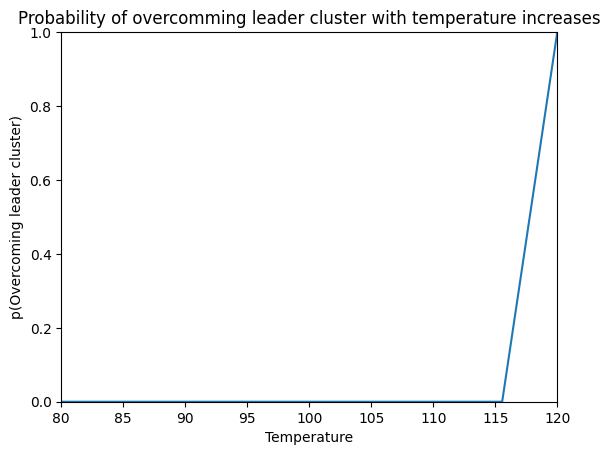

In [40]:
"""
plt.figure()
plt.imshow(model.opinion_grid, cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.title(f'End,\n T={TEMP}, H={H}, B={BETA_PEOPLE}, Bl={BETA_LEADER}, sL={S_LEADER},c_radius={int(average_cluster_sizes[T_VALUES-1])}')
plt.tight_layout()
plt.show()
"""

print(p_overcoming_leader)

# Plot
fig, ax = ca.plot_critical_temperature(temperatures,p_overcoming_leader,xmin,xmax,T_VALUES,R)


In [8]:
# Save data and parameters used to file!


## SOC Hypothesis
Hypothesis: When the system is at its critical temperature, the observed cluster sizes and durations will follow a power law distribution

In [9]:
# Step 0 - Find the critical temperature of the system
## Empirically (like shown in critical_temperature.py) or
## Analitically, using the approximations referenced in the CA paper
# Done in threshold_plot!!!

# Step 1 - Set the system to the critical temperature
critical_temperature = 50

# Step 2 - Set system to the parameters used to find the critical temperature
GRIDSIZE_X,GRIDSIZE_Y = 21,21
TIMESTEPS = 1000
#TEMPERATURE = 0
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
p = 1
p_1 = 0.5 # In this scenario everybody believed the leader at start for calibration, but here in simulation we dont need it anymore!!!

INFLUENCE_LEADER = 100             # The one 
a_0 = 1
INFLUENCE_DISTRIBUTION_MEAN = 1

In [10]:
# Step 3 - Simulate system at this critical temperature
temperature = critical_temperature
model = ca.CA(GRIDSIZE_X, GRIDSIZE_Y, temperature, BETA_LEADER, BETA_PEOPLE, H, p, p_1, INFLUENCE_LEADER, INFLUENCE_DISTRIBUTION_MEAN, ca.euclidean_distance, ca.prob_dist_influence_people)
data = model.evolve(TIMESTEPS)

AttributeError: module 'demos.ca.cellular_automata' has no attribute 'euclidean_distance'

In [ ]:
# Save data
np.save('./data/soc_sim_data.npy', data)

# Save parameters
parameters = {'GRIDSIZE_X':GRIDSIZE_X,
              'GRIDSIZE_Y':GRIDSIZE_Y,
              'temperature':temperature,
              'BETA_LEADER':BETA_LEADER,
              'BETA_PEOPLE':BETA_PEOPLE,
              'H':H,
              'p':p,
              'p_1':p_1,
              'INFLUENCE_LEADER':INFLUENCE_LEADER,
              'INFLUENCE_DISTRIBUTION_MEAN':INFLUENCE_DISTRIBUTION_MEAN,
              'distance':'euclidean_distance',
              'prob_dist':'prob_dist_influence_people'}


In [ ]:
# Save data to file
# And parameters too
"""critical_temperature = 50

# Step 2 - Set system to the parameters used to find the critical temperature
GRIDSIZE_X,GRIDSIZE_Y = 21,21
TIMESTEPS = 25000
#TEMPERATURE = 0
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
p = 1
p_1 = 0.5 # In this scenario everybody believed the leader at start for calibration, but here in simulation we dont need it anymore!!!

INFLUENCE_LEADER = 100             # The one 
a_0 = 1
INFLUENCE_DISTRIBUTION_MEAN = 1
"""

In [ ]:
# Make a copy to avoid overwriting the data
data_copy = data.copy()

In [ ]:
# Step 4 - Plot opinion change to see if clusters do form
#model.plot_opinion_grid_at_time_t(data_copy,5) # This creates a video in the folder figures!
model.plot_opinion_grid_evolution(data_copy,save=True)

In [ ]:
opinions = data_copy['opinions'][5].copy()
opinions[opinions == 1] = 0
opinions[opinions == -1] = 1
print(opinions)

In [ ]:
# Step 5 - Get cluster sizes from simulation
R = int(GRIDSIZE_X/2)

# To feed it to the function we first turn the 1s into 0s and the -1s into 1s
lw, num_cluster = measurements.label(opinions)
areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))
unique, counts = np.unique(areas, return_counts=True)

#print(lw,num_cluster)
#print('Areas',areas)

print('Unique values and counts',unique,counts)


# MVP: Count connected individuals with same opinion
# https://stackoverflow.com/questions/25664682/how-to-find-cluster-sizes-in-2d-numpy-array
# TODO: Count actual grid sizes


In [ ]:
# Step 6 - Plot them to see if their sizes follow power law
plt.scatter(unique,counts,facecolors='none', edgecolors='blue')

In [ ]:
# Step 7 - Verify it with the package powerlaw

In [ ]:
# Same thing but with entire simulation
data_copy = data.copy()
sim_data = data_copy.copy()

total_unique = np.linspace(1,model.N,model.N)
total_counts = np.zeros(model.N).astype(int)

#print('Total counts',total_counts)

for time_step in range(TIMESTEPS):
    data_t = sim_data['opinions'][time_step, :, :].copy()
    data_t[data_t == 1] = 0
    data_t[data_t == -1] = 1

    lw, num_cluster = measurements.label(data_t)
    areas = measurements.sum(data_t, lw, index=arange(lw.max() + 1))
    unique, counts = np.unique(areas, return_counts=True)

    unique = unique.astype(int)
    counts = counts.astype(int)

    # Update the total_counts at those locations
    #np.take(total_counts, unique)
    # https://numpy.org/doc/stable/reference/generated/numpy.put.html
    np.put(total_counts,unique,np.take(total_counts, unique) + counts) # Should be counts+previous value

    #np.place(total_counts, unique, counts)

    #print(unique, counts)
    #print(total_counts)

    # Add counts of every unique value
    #for index in unique:

        #print('Unique',int(index))
        #print('Test',total_counts[int(index)])
        #print('Test2',counts[int(index)])

        #total_counts[int(index)] += counts[int(index)]


    #plt.scatter(unique,counts,facecolors='none', edgecolors='blue')
    #print(unique,counts)

#print(total_counts)


d=total_counts
fit = powerlaw.Fit(np.array(d)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print(fit)

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

#plt.scatter(total_unique,total_counts,facecolors='none', edgecolors='blue')

# Sum them!!!

#plt.xlabel('Connected nodes')
#plt.ylabel('Frequency')


#R = int(GRIDSIZE_X/2)
# To feed it to the function we first turn the 1s into 0s and the -1s into 1s
#print(lw,num_cluster)
#print('Areas',areas)

#print('Unique values and counts',unique,counts)

In [ ]:
plt.loglog(total_unique,total_counts)

print(total_counts)

### Test the hypothesis now for cluster sizes
For this we need to change our code such that instead of counting clusters of connected nodes, we also ensure they have circular shape!